# LU-Zerlegung
LU-Zerlegung ist eine Methode um eine Gleichungsystem zu Lösen. Das Gleichungsystem hat die folgende Form: $b=Ax$, (b und x sind Vektoren und A ist eine Matrix). Man kann A in 2 Dreieckmatrizen zerlegen: A=LU, L ist eine linke untere Dreieckmatrix und U ist eine rechte obere Dreieckmatrix.

Das Gleichungsystem:
# $b=Ax=(LU)x$
Nach der Zerlegung werden die Folgenden Gleichungsysteme durch Substitution gelöst (für die obere: Vorwärts-Einsetzen beginnend mit der 1. Zeile; für die untere: Rückwärts-Einsetzen, beginnend mit der letzten Zeile):
# $b(p)=Ly$
# $y=Ux$

In [1]:
import numpy as np
import time
import scipy.linalg
import matplotlib.pyplot as plt
from tabulate import tabulate

In [2]:
def solve (P, L, U, b):
    y=np.linalg.solve (L, np.dot(b,P))
    x=np.linalg.solve (U, y)
    return x

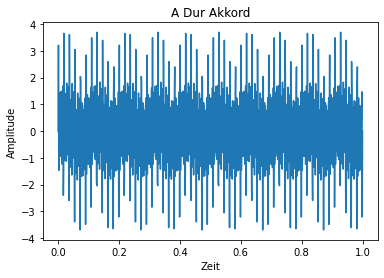

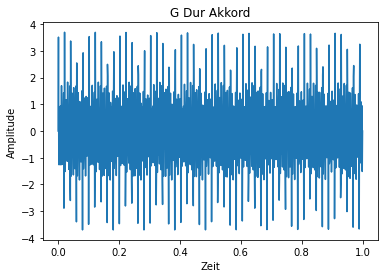

In [3]:
t=np.linspace(0,1,1001)
f1=220
f2=275
f3=330
f4=440
b_A=np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t) + np.sin(2*np.pi*f3*t) + np.sin(2*np.pi*f4*t)
f1g=198
f2g=247.5
f3g=297
f4g=396
b_G=np.sin(2*np.pi*f1g*t) + np.sin(2*np.pi*f2g*t) + np.sin(2*np.pi*f3g*t) + np.sin(2*np.pi*f4g*t)
plt.plot(t, b_A)
plt.title('A Dur Akkord')
plt.xlabel('Zeit')
plt.ylabel('Amplitude')
plt.show()
plt.plot(t, b_G)
plt.title('G Dur Akkord')
plt.xlabel('Zeit')
plt.ylabel('Amplitude')
plt.show()

f=np.arange(0,500.1,0.5)
A=np.zeros((1001,1001))
for i in range(1001):
    A[i][0]=1
    A[i][1000]=t[i]
    #print(A[i][1000])
for i in range(1001):
    for j in range(1, 1000):
        A[i][j]=np.sin(2*np.pi*f[j]*t[i])


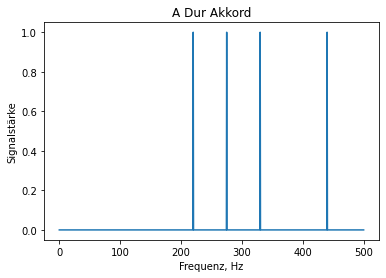

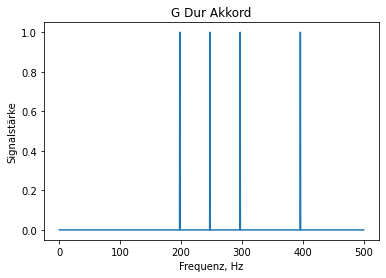

In [4]:
P,L,U=scipy.linalg.lu(A)


x_A=solve(P, L, U, b_A)
x_G=solve(P, L, U, b_G)
plt.plot(f, x_A)
plt.title('A Dur Akkord')
plt.xlabel('Frequenz, Hz')
plt.ylabel('Signalstärke')
plt.show()
plt.plot(f, x_G)
plt.title('G Dur Akkord')
plt.xlabel('Frequenz, Hz')
plt.ylabel('Signalstärke')
plt.show()

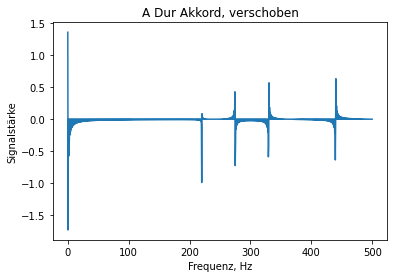

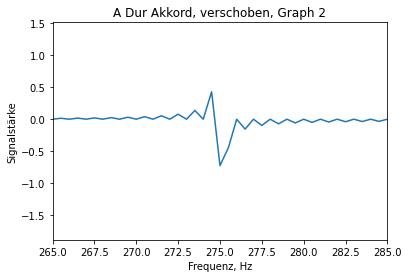

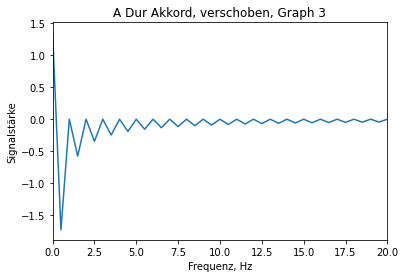

In [5]:
phi1, phi2, phi3, phi4=2*np.pi*np.random.rand(4)
phi1, phi2, phi3, phi4=3, 3.9, 2, 1.5
b_A_verschoben=np.sin(2*np.pi*f1*t+phi1) + np.sin(2*np.pi*f2*t+phi2)
b_A_verschoben+= np.sin(2*np.pi*f3*t+phi3)+ np.sin(2*np.pi*f4*t+phi4)

x_A_verschoben=solve(P, L, U, b_A_verschoben)
plt.plot(f, x_A_verschoben)
plt.title('A Dur Akkord, verschoben')
plt.xlabel('Frequenz, Hz')
plt.ylabel('Signalstärke')
plt.show()


plt.plot(f, x_A_verschoben)
plt.xlim(265,285)
plt.title('A Dur Akkord, verschoben, Graph 2')
plt.xlabel('Frequenz, Hz')
plt.ylabel('Signalstärke')
plt.show()

plt.plot(f, x_A_verschoben)
plt.xlim(0,20)
plt.title('A Dur Akkord, verschoben, Graph 3')
plt.xlabel('Frequenz, Hz')
plt.ylabel('Signalstärke')
plt.show()

Dieser Graph sieht ganz anders aus. Das Gleichungssytem b=Ax versucht das Signal als Summe von Sinusfunktionen mit verschiedenen Frequenzen und keinen Phasenverschiebungen darzustellen. Deshalb sieht man zwar die urprünglichen Frequenzen an diesem Graph aber es gibt auch mehrere andere Spitzen, die diesen Frequenzen nicht entsprechen. Der Grund dafür ist, dass das Gleichungssytem versucht auch die Phasenverschiebung als separate Sinusfunktionen zu zerlegen. An dem mittleren Graph 2 (dieselbe Funktion, aber zwischen 265 und 285 Hz) sieht man deutlich, dass es eine riesige Anzahl von Spitzen gibt und die größste Spitze entspricht dem Wert 275Hz, die eine von den richtigen Antworten war. Aber es gibt auch andere lange Spitzen, (man kann ein Beispiel an dem unteren Graph 3 (zwischen 0 und 20 Hz) sehen), die keine richtige Frequenzen sind. Deshalb ist diese Methode nicht sehr nutzvoll für Signale mit Phasenverschiebung.

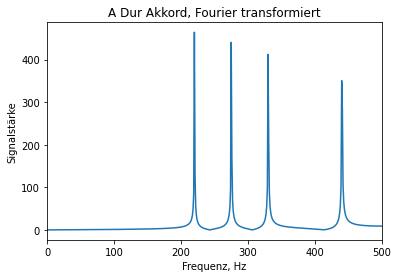

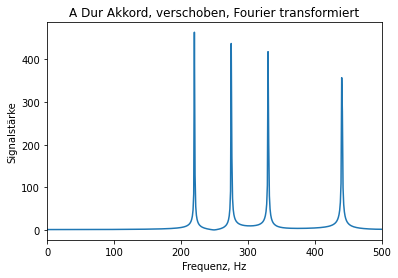

In [6]:
f=np.arange(0,1000.1,1)
x=np.fft.fft(b_A)
plt.plot(f, np.abs(x))
plt.title('A Dur Akkord, Fourier transformiert')
plt.xlabel('Frequenz, Hz')
plt.ylabel('Signalstärke')
plt.xlim(0,500)
plt.show()

x=np.fft.fft(b_A_verschoben)
plt.plot(f, np.abs(x))
plt.title('A Dur Akkord, verschoben, Fourier transformiert')
plt.xlabel('Frequenz, Hz')
plt.ylabel('Signalstärke')
plt.xlim(0,500)
plt.show()

Die Fourier-Transformation (FT) des Signals muss stetig sein. Deswegen kann es nicht identisch wie die A-Dur-Akkord Graph aussehen. Aber mit den Spitzen kann man die richtige Frequenzen leicht erkennen. Außerdem sind die Phasenverschiebungen kein Problem für FT, deswegen funktioniert diese Methode sehr gut für die beiden Fälle.